# [Machine Learning Mastery CNN](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)

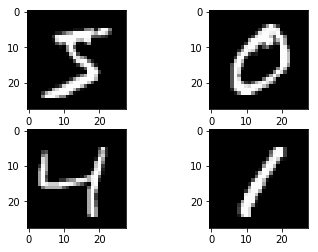

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import plaidml.keras as pl # TENSORFLOW w/ ROCm doesn't work w/ FX-8350 due to PCI-E 2.0
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# yay ez dataset import :D
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

### Machine Learning Mastery Example model

Make the 28x28 into a giant vector and normalize it and categorize the outputs

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# define baseline model
def baseline_model_MLM_normal():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = baseline_model_MLM_normal()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2743 - acc: 0.9230 - val_loss: 0.1424 - val_acc: 0.9585
Epoch 2/10
 - 4s - loss: 0.1090 - acc: 0.9685 - val_loss: 0.0917 - val_acc: 0.9721
Epoch 3/10
 - 4s - loss: 0.0699 - acc: 0.9799 - val_loss: 0.0812 - val_acc: 0.9753
Epoch 4/10
 - 4s - loss: 0.0495 - acc: 0.9857 - val_loss: 0.0697 - val_acc: 0.9781
Epoch 5/10
 - 4s - loss: 0.0360 - acc: 0.9900 - val_loss: 0.0616 - val_acc: 0.9817
Epoch 6/10
 - 4s - loss: 0.0262 - acc: 0.9932 - val_loss: 0.0640 - val_acc: 0.9798
Epoch 7/10
 - 4s - loss: 0.0185 - acc: 0.9956 - val_loss: 0.0673 - val_acc: 0.9781
Epoch 8/10
 - 4s - loss: 0.0145 - acc: 0.9964 - val_loss: 0.0615 - val_acc: 0.9809
Epoch 9/10
 - 4s - loss: 0.0107 - acc: 0.9977 - val_loss: 0.0616 - val_acc: 0.9798
Epoch 10/10
 - 4s - loss: 0.0075 - acc: 0.9986 - val_loss: 0.0594 - val_acc: 0.9825
Baseline Error: 1.75%


### My stuff 

In [34]:
# define baseline model
def normal_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = normal_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.4716 - acc: 0.8737 - val_loss: 0.2848 - val_acc: 0.9164
Epoch 2/10
 - 4s - loss: 0.2648 - acc: 0.9243 - val_loss: 0.2371 - val_acc: 0.9325
Epoch 3/10
 - 4s - loss: 0.2161 - acc: 0.9373 - val_loss: 0.1976 - val_acc: 0.9410
Epoch 4/10
 - 4s - loss: 0.1793 - acc: 0.9481 - val_loss: 0.1658 - val_acc: 0.9504
Epoch 5/10
 - 4s - loss: 0.1495 - acc: 0.9565 - val_loss: 0.1421 - val_acc: 0.9581
Epoch 6/10
 - 4s - loss: 0.1248 - acc: 0.9643 - val_loss: 0.1273 - val_acc: 0.9627
Epoch 7/10
 - 4s - loss: 0.1068 - acc: 0.9690 - val_loss: 0.1174 - val_acc: 0.9650
Epoch 8/10
 - 4s - loss: 0.0916 - acc: 0.9741 - val_loss: 0.1036 - val_acc: 0.9678
Epoch 9/10
 - 4s - loss: 0.0784 - acc: 0.9773 - val_loss: 0.0925 - val_acc: 0.9725
Epoch 10/10
 - 4s - loss: 0.0674 - acc: 0.9809 - val_loss: 0.0866 - val_acc: 0.9733
Baseline Error: 2.67%


### Machine Learning Mastery CNN example code

In [12]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [13]:
def baseline_model_MLM_cnn():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = baseline_model_MLM_cnn()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Exception: Invalid output size computed for convolution: num_out_size=-3

In [3]:
# Larger CNN for the MNIST Dataset
import os
import numpy
import plaidml.keras as pl
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
#K.set_image_dim_ordering('th')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [4]:
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


Exception: Invalid output size computed for convolution: num_out_size=-3

# WORK YOU SHIT

In [16]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import scipy.ndimage

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/100


INFO:plaidml:Analyzing Ops: 121 of 320 operations complete


 722/1563 [============>.................] - ETA: 39s - loss: 2.0391 - acc: 0.2410

INFO:plaidml:Analyzing Ops: 127 of 320 operations complete


1563/1563 [==============================] - 82s 52ms/step - loss: 1.8897 - acc: 0.3031 - val_loss: 1.6156 - val_acc: 0.4161
Epoch 2/100
1563/1563 [==============================] - 49s 32ms/step - loss: 1.5819 - acc: 0.4212 - val_loss: 1.5030 - val_acc: 0.4628
Epoch 3/100
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4576 - acc: 0.4732 - val_loss: 1.3004 - val_acc: 0.5289
Epoch 4/100
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3797 - acc: 0.5033 - val_loss: 1.2420 - val_acc: 0.5550
Epoch 5/100
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3094 - acc: 0.5348 - val_loss: 1.2108 - val_acc: 0.5701
Epoch 6/100
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2523 - acc: 0.5549 - val_loss: 1.0880 - val_acc: 0.6136
Epoch 7/100
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1990 - acc: 0.5752 - val_loss: 1.0904 - val_acc: 0.6170
Epoch 8/100
1563/1563 [==============================

1563/1563 [==============================] - 51s 33ms/step - loss: 0.7714 - acc: 0.7408 - val_loss: 0.7271 - val_acc: 0.7620
Epoch 61/100
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7714 - acc: 0.7397 - val_loss: 0.7024 - val_acc: 0.7673
Epoch 62/100
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7689 - acc: 0.7397 - val_loss: 0.7449 - val_acc: 0.7493
Epoch 63/100
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7697 - acc: 0.7417 - val_loss: 0.7014 - val_acc: 0.7702
Epoch 64/100
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7677 - acc: 0.7416 - val_loss: 0.6826 - val_acc: 0.7738
Epoch 65/100
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7722 - acc: 0.7393 - val_loss: 0.7027 - val_acc: 0.7719
Epoch 66/100
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7698 - acc: 0.7429 - val_loss: 0.6992 - val_acc: 0.7654
Epoch 67/100
1563/1563 [=======================